In [ ]:
# Importing relevant libraries

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers, activations, callbacks, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [ ]:
# Loading the CIFAR-10 dataset
(X_train, y_train),( X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
# Data pre-processing
X_train, X_test = X_train/255 , X_test / 255

In [ ]:
# Setting up the VGG16 inspired model

model = Sequential()

model.add(layers.Conv2D(32, (4,4), strides = (1,1), padding='same', input_shape= X_train[0].shape, activation='relu' ))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2), strides=1))
model.add(layers.Dropout(.2))

model.add(layers.Conv2D(32, (4,4), strides = (1,1), padding='same', activation='relu' ))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2), strides=1))
model.add(layers.Dropout(.2))

model.add(layers.Conv2D(64, (3,3), strides = (1,1), padding='same', activation='relu' ))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(.2))

model.add(layers.Conv2D(64, (3,3), strides = (1,1), padding='same', activation='relu' ))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(.2))

model.add(layers.Conv2D(128, (3,3), strides = (1,1), padding='same', activation='relu' ))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(.2))

model.add(layers.Conv2D(128, (3,3), strides = (1,1), padding='same', activation='relu' ))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(.2))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        1568      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 32)        16416     
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0

In [ ]:
# Callbacks for early stopping and saving

earlystop = callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 0.0075, #0.75%
    patience = 5,
    verbose = 2,
)

path = '/content/final_cnn_39.hdf5'

checkpoint = callbacks.ModelCheckpoint(
    filepath = path,
    monitor = 'val_accuracy',
    verbose = 1,
    save_best_only = True
)

In [ ]:
# Compiling the model

optimize = 'adamax'

model.compile(optimizer = optimize,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train , y_train, 
                    epochs=100, 
                    validation_data=(X_test, y_test), 
                    callbacks = [checkpoint])

Epoch 1/100
1563/1563 [==============================] - ETA: 0s - loss: 2.0435 - accuracy: 0.4123
Epoch 00001: val_accuracy improved from -inf to 0.42120, saving model to /content/final_cnn_39.hdf5
1563/1563 [==============================] - 14s 9ms/step - loss: 2.0435 - accuracy: 0.4123 - val_loss: 2.0321 - val_accuracy: 0.4212
Epoch 2/100
1558/1563 [============================>.] - ETA: 0s - loss: 1.9224 - accuracy: 0.5358
Epoch 00002: val_accuracy did not improve from 0.42120
1563/1563 [==============================] - 14s 9ms/step - loss: 1.9225 - accuracy: 0.5357 - val_loss: 2.0832 - val_accuracy: 0.3715
Epoch 3/100
1562/1563 [============================>.] - ETA: 0s - loss: 1.8703 - accuracy: 0.5881
Epoch 00003: val_accuracy improved from 0.42120 to 0.57830, saving model to /content/final_cnn_39.hdf5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8703 - accuracy: 0.5880 - val_loss: 1.8805 - val_accuracy: 0.5783
Epoch 4/100
1557/1563 [====================

In [ ]:
model.load_weights(path)

313/313 - 1s - loss: 1.6215 - accuracy: 0.8387


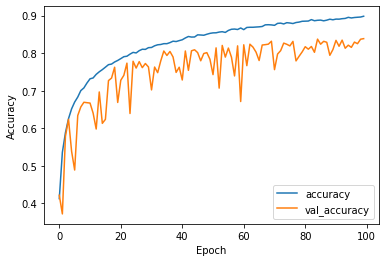

In [ ]:
# Plotting training and validation accuracy over epochs

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('vgg_based_cnn_accuracy.png')

# Testing accuracy
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

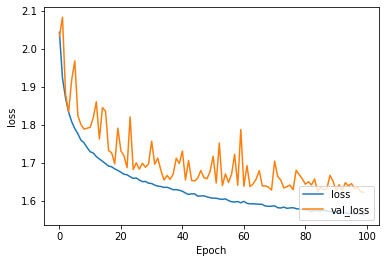

In [ ]:
# Plotting training and validation loss over epochs

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.savefig('vgg_based_cnn_loss.png')

In [ ]:
test_acc

0.838699996471405